# `Climate4` Jupyter Hub ([Santander Meteorolgoy Group](http://www.meteo.unican.es))

## Code of the paper Gutiérrez et al. (2018) *climate research reproducibility with the climate4R R-based framework*, in 8th International Workshop on Climate Informatics, 61-64, C. Chen et al. Editors. doi: [10.5065/D6BZ64XQ](http://dx.doi.org/10.5065/D6BZ64XQ)

This notebook includes the code used in the paper to illustrate the basic functionality of the [climate4R framework](http://www.meteo.unican.es/climate4R) (formed by the core packages `loadeR`, `transformeR`, `downscaleR`, and `visualizeR`, as well as some wrappers to exiting packages, such as `climate4R.climdex`, which allows the calculation of the [ETCCDI core indices](http://etccdi.pacificclimate.org/list_27_indices.shtml)). The example illustrates how to load, transform and downscale (bias adjust in this case) some representative (EURO-)CORDEX data for a Southern European region (the E-OBS gridded observational datasets is used as reference) in order to compute bias corrected projections of a climate index (summer days, SU). A more detailed description of climate4R and more comprehensive examples are provided in the  reference paper, published in *Environmental Modelling & Software* journal (https://doi.org/10.1016/j.envsoft.2018.09.009).  

All operations hereinafter are performed with the climate4R framework, except the creation of the color palettes used in map visualization, for which the package `RColorBrewer` is used:

In [1]:
library(RColorBrewer)
colSU <- rev(brewer.pal(n = 9, "RdYlBu"))
coldelta <- brewer.pal(n = 9, "Reds")
colbias <- brewer.pal(n = 9, "PiYG")
coltx <- rev(brewer.pal(n = 9, "Spectral"))

### 1. Loading the climate4R framework packages

The packages forming the climate4R framework are already installed in the climate4R jupyter hub, so they can be loaded into the current session (user guidance for the different packages, including instructions for local installation, is available at the corresponding GitHub wikis, e.g. https://github.com/SantanderMetGroup/loadeR/wiki).

In [2]:
climate4R <- list("loadeR", "transformeR", "downscaleR", "visualizeR", "climate4R.climdex")
lapply(climate4R, require, character.only = TRUE) 

Loading required package: loadeR
Loading required package: rJava
Loading required package: loadeR.java
Java version 10x amd64 by Oracle Corporation detected
NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready
loadeR version 1.4.9 (2018-12-17) is loaded
Please use 'citation("loadeR")' to cite this package.
Loading required package: transformeR
transformeR version 1.4.7 (2018-12-17) is loaded
Please see 'citation("transformeR")' to cite this package.
Loading required package: downscaleR
Loading required package: deepnet
Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

downscaleR version 3.0.5 (2018-12-17) is loaded
Please use 'citation("downscaleR")' to cite this package.
Loading required package: visualizeR
Loading required package: sm
Warning message:
“no DISPLAY variable so Tk is not available”Package 'sm', version 2.2-5.6: type help(sm) for summary information
visualizeR version 1.3.1 (2018-12-17)

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

### 2. Setting the geografic domain and season

Southern Europe is selected as the target region, focusing on annual data (note that any particular season can be selected for analysis, e.g. DJF `seas <- c(12,1,2)`).  

In [3]:
lon <- c(-10,20); lat <- c(35,46); seas <- 1:12

This example illustrates different possibilities to access climate data using climate4R, specifying the above parameters together with the time period: 
1. Local data (using self-generated aggregated catalogs, via [NcML](https://www.unidata.ucar.edu/software/thredds/v4.3/netcdf-java/ncml/v2.2/Tutorial.html) files), 
2. Remote data from any OpenDAP repository, 
3. Remote data from the climate4R User Data Gateway (UDG), a [THREDDS](https://www.unidata.ucar.edu/software/thredds/current/tds/) Data Server for climate4R integrated within the jupyter hub infrastructure (near data computing). 

### 3. Loading (remote) E-OBS observations and summer days (SU) calculation

E-OBS data is loaded from the remote OpenDAP repository at KNMI. Please, note that when new versions become available the link is no longer valid since the URL is updated with the version number. Therefore, if the code below doesn't work please check the current E-OBS version and update the URL (https://www.ecad.eu/download/ensembles/download.php). 

In [4]:
eobs <- "http://opendap.knmi.nl/knmi/thredds/dodsC/e-obs_0.25regular/tx_0.25deg_reg_v17.0.nc"

The [`climate4R.climdex`](https://github.com/SantanderMetGroup/climate4R.climdex) package is a wrapper of the R package [climdex.pcic](https://github.com/pacificclimate/climdex.pcic) allowing for a seamless integration with the climate4R data structures for the calculation of the ETCCDI core indices, and providing support for parallel computing. In particular, the example below computes Number_of_summer_days (code [SU](http://etccdi.pacificclimate.org/list_27_indices.shtml), climdex.su function) for E-OBS daily maximum temperature for the period 1971-2000 (as obtained by `loadGridData`, the main function of `loadeR` together with a counterpart for station-based data: [`loadStationData`](https://github.com/SantanderMetGroup/loadeR/wiki), not shown in this example). The `visualizeR` funcion `spatialPlot` allows to display regular and (pole-)rotated gridded products, the index climatology in this case (additionally the function `temporalPlot` allows to display multiple time series, as shown later). 

[2018-12-20 19:03:01] Opening dataset...
[2018-12-20 19:03:03] The dataset was successfuly opened
[2018-12-20 19:03:03] Defining geo-location parameters
[2018-12-20 19:03:03] Defining time selection parameters
[2018-12-20 19:03:03] Retrieving data subset ...
[2018-12-20 19:14:33] Done
[2018-12-20 19:14:38] Calculating SU ...
[2018-12-20 19:15:40] Done
[2018-12-20 19:15:40] - Computing climatology...
[2018-12-20 19:15:40] - Done.


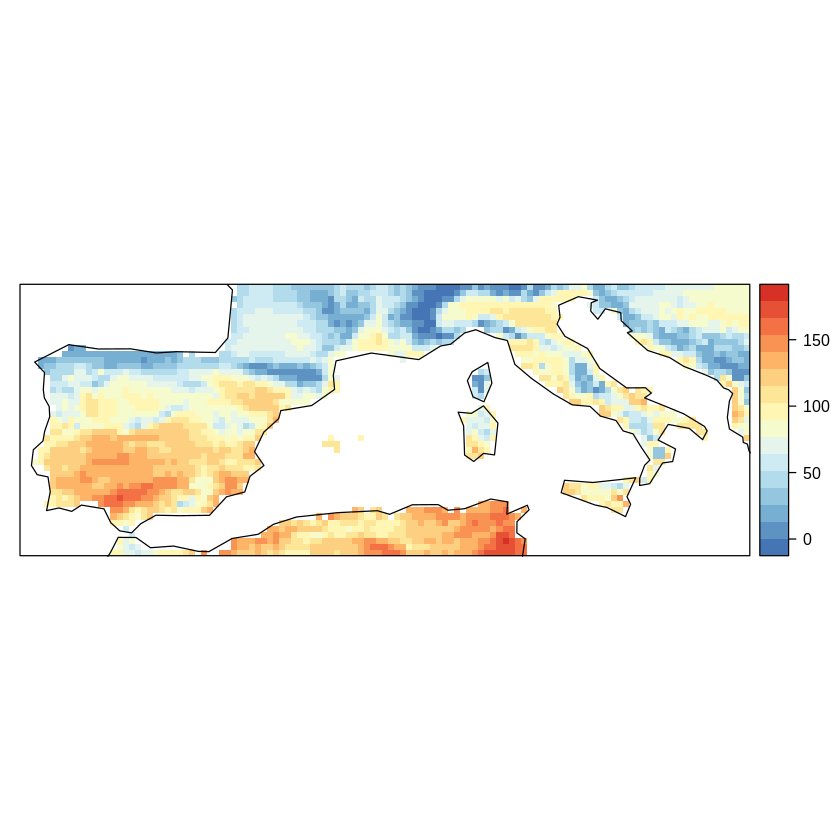

In [5]:
obs.tx <- loadGridData(eobs, var = "tx",
                       years = 1971:2000, season = seas,
                       lonLim = lon, latLim = lat)
obs.SU <- climdexGrid(tx = obs.tx, index.code = "SU")
spatialPlot(climatology(obs.SU), col.regions = colorRampPalette(colSU), backdrop.theme = "coastline") 

### 4. Loading (local) historical CORDEX data and SU calculation

Illustrative historical and RCP8.5 simulations for a representative CORDEX model (the RCA4 SMHI model, for the 0.44 European domain) are available in the shared folder of the climate4R jupyter hub (in the folder "local_nc_data", with two subfolders "historical" and "rcp85" each with six files containing data for 5-year periods). 
The function `dataInventory` allows to explore the content of a particular file.

In [7]:
di <- dataInventory("data/historical/tasmax_EUR-44_ICHEC-EC-EARTH_historical_r12i1p1_SMHI-RCA4_v1_day_19710101-19751231.nc")
di$tasmax

[2018-12-20 19:15:52] Doing inventory ...
[2018-12-20 19:15:52] Retrieving info for 'tasmax' (0 vars remaining)
[2018-12-20 19:15:52] Done.


$Description
[1] "Daily Maximum Near-Surface Air Temperature"

$DataType
[1] "float"

$Units
[1] "K"

$Dimensions
$Dimensions$time
$Dimensions$time$Type
[1] "Time"

$Dimensions$time$TimeStep
[1] "1.0 days"

$Dimensions$time$Units
[1] "days since 1949-12-01 00:00:00"

$Dimensions$time$Date_range
[1] "1971-01-01T12:00:00Z - 1975-12-31T12:00:00Z"


$Dimensions$lat
$Dimensions$lat$Type
[1] "GeoY"

$Dimensions$lat$Units
[1] "degrees"

$Dimensions$lat$Values
  [1] -23.21 -22.77 -22.33 -21.89 -21.45 -21.01 -20.57 -20.13 -19.69 -19.25
 [11] -18.81 -18.37 -17.93 -17.49 -17.05 -16.61 -16.17 -15.73 -15.29 -14.85
 [21] -14.41 -13.97 -13.53 -13.09 -12.65 -12.21 -11.77 -11.33 -10.89 -10.45
 [31] -10.01  -9.57  -9.13  -8.69  -8.25  -7.81  -7.37  -6.93  -6.49  -6.05
 [41]  -5.61  -5.17  -4.73  -4.29  -3.85  -3.41  -2.97  -2.53  -2.09  -1.65
 [51]  -1.21  -0.77  -0.33   0.11   0.55   0.99   1.43   1.87   2.31   2.75
 [61]   3.19   3.63   4.07   4.51   4.95   5.39   5.83   6.27   6.71   7.15
 [71]   7.59   8.03   8.47   8.91   9.35   9.79  10.23  10.67  11.11  11.55
 [81]  11.99  12.43  12.87  13.31  13.75  14.19  14.63  15.07  15.51  15.95
 [91]  16.39  16.83  17.27  17.71  18.15  18.59  19.03  19.47  19.91  20.35
[101]  20.79  21.23  21.67


$Dimensions$lon
$Dimensions$lon$Type
[1] "GeoX"

$Dimensions$lon$Units
[1] "degrees"

$Dimensions$lon$Values
  [1] -28.21 -27.77 -27.33 -26.89 -26.45 -26.01 -25.57 -25.13 -24.69 -24.25
 [11] -23.81 -23.37 -22.93 -22.49 -22.05 -21.61 -21.17 -20.73 -20.29 -19.85
 [21] -19.41 -18.97 -18.53 -18.09 -17.65 -17.21 -16.77 -16.33 -15.89 -15.45
 [31] -15.01 -14.57 -14.13 -13.69 -13.25 -12.81 -12.37 -11.93 -11.49 -11.05
 [41] -10.61 -10.17  -9.73  -9.29  -8.85  -8.41  -7.97  -7.53  -7.09  -6.65
 [51]  -6.21  -5.77  -5.33  -4.89  -4.45  -4.01  -3.57  -3.13  -2.69  -2.25
 [61]  -1.81  -1.37  -0.93  -0.49  -0.05   0.39   0.83   1.27   1.71   2.15
 [71]   2.59   3.03   3.47   3.91   4.35   4.79   5.23   5.67   6.11   6.55
 [81]   6.99   7.43   7.87   8.31   8.75   9.19   9.63  10.07  10.51  10.95
 [91]  11.39  11.83  12.27  12.71  13.15  13.59  14.03  14.47  14.91  15.35
[101]  15.79  16.23  16.67  17.11  17.55  17.99

The function `makeAggregatedDataset` scans all the information contained in the files of a particular directory, creating a catalog for data access in the form of a NcML file (see [unidata tutorial](https://www.unidata.ucar.edu/software/thredds/v4.3/netcdf-java/ncml/v2.2/Tutorial.html) and the [loadeR GitHub wiki](https://github.com/SantanderMetGroup/loadeR/wiki/Dataset-definition-and-loading-local-grid-data)), which constitutes a single entry point for the whole dataset. This makes data access more efficient through a unique entry point, independent of the particular division in files. 

In [8]:
makeAggregatedDataset(source.dir = "data/historical/", 
                       ncml.file = "data/historical.ncml", verbose = TRUE)

[2018-12-20 19:15:55] Creating dataset from 6 files
[2018-12-20 19:15:55] Scanning file 1 out of 1
[2018-12-20 19:15:55] Defining aggregating dimension length
This process may be slow but will significantly speed-up data retrieval...
[2018-12-20 19:15:55] Dimension length defined
[2018-12-20 19:15:55] NcML file "data/historical.ncml" created from 6 files corresponding to 1 variables
Use 'dataInventory' to obtain a description of the dataset


The historical simulations are loaded and transformed from Kelvin (the original units of the dataset, as shown above) to Celsius degrees (as in E-OBS). This is done using `gridArithmethics`, which performs arithmetic operations on the data while preserving the  metadata and structures. Note that unit conversion can be more efficiently performed using [`convertR`](https://github.com/SantanderMetGroup/convertR) involving metadata conversion. However, we want to keep this example as simple as possible and, therefore, unit conversion is manually performed.

[2018-12-20 19:16:04] Defining geo-location parameters
[2018-12-20 19:16:04] Defining time selection parameters
[2018-12-20 19:16:04] Retrieving data subset ...
[2018-12-20 19:16:09] Done
[2018-12-20 19:16:15] Calculating SU ...
[2018-12-20 19:16:52] Done
[2018-12-20 19:16:52] - Computing climatology...
[2018-12-20 19:16:52] - Done.


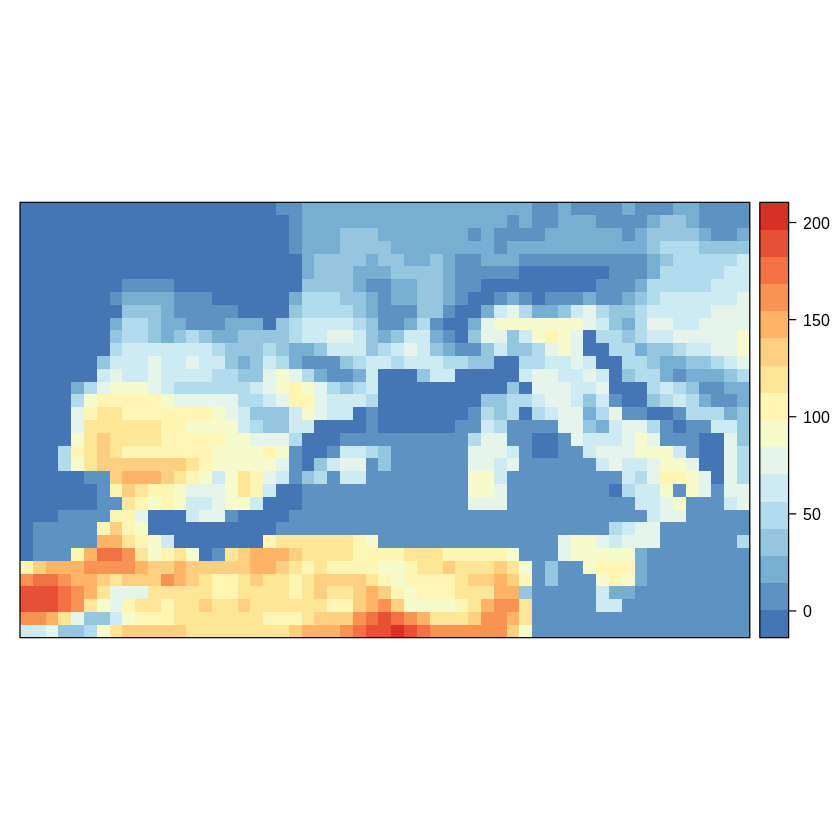

In [9]:
rcm.tx.K <- loadGridData(dataset="data/historical.ncml", 
                       var = "tasmax",years = 1971:2000, season = seas,
                       lonLim = lon, latLim = lat)
rcm.tx <- gridArithmetics(rcm.tx.K, 273, operator = "-")
rcm.su <- climdexGrid(tx = rcm.tx, index.code = "SU")
spatialPlot(climatology(rcm.su), col.regions = colorRampPalette(colSU))

Note that the resulting data is diplayed in the original rotated coordinates and, therefore, some regridding is necessary to harmonize the (rotated) CORDEX and the (regular) E-OBS datasets used in this illustrative example.

### 5. Regridding CORDEX data to the E-OBS grid 

The function `interpGrid` performs regridding from a particular climate4R grid towards a target spatial grid (e.g. obtained with `getGrid`). Standard bilineal and nearest neighbor interpolation methods are defined building on standard implementations from the "akima" and "fields" packages (`?interpGrid` for more details).

NOTE: argument 'bilin.method' ignored for nearest neighbour interpolation
[2018-12-20 19:16:56] Calculating nearest neighbors...
[2018-12-20 19:16:56] Performing nearest interpolation... may take a while
[2018-12-20 19:16:56] Done
[2018-12-20 19:16:56] - Computing climatology...
[2018-12-20 19:16:56] - Done.


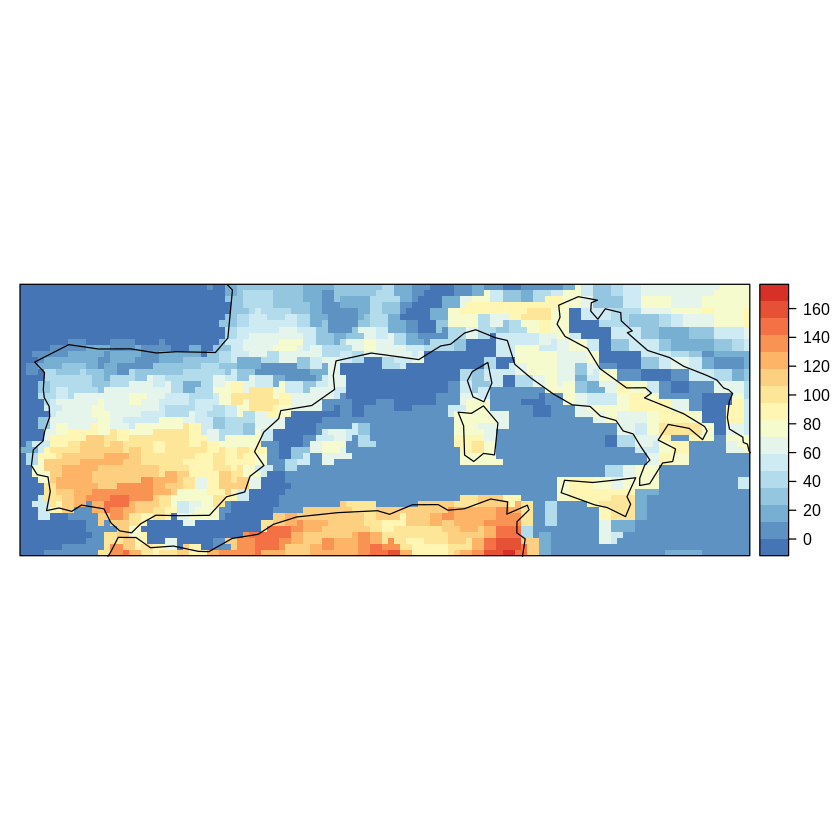

In [10]:
rcm.SU <- interpGrid(grid = rcm.su, new.coordinates = getGrid(obs.SU))
spatialPlot(climatology(rcm.SU), col.regions = colorRampPalette(colSU), backdrop.theme = "coastline") 

### 6. Calculating (historical) CORDEX SU biases

By comparing the two SU plots above (for E-OBS and the historical CORDEX) it can be seen that the CORDEX model underestimates the number of summer days (SU). The bias is calculated and plotted below.

[2018-12-20 19:17:00] - Computing climatology...
[2018-12-20 19:17:00] - Done.


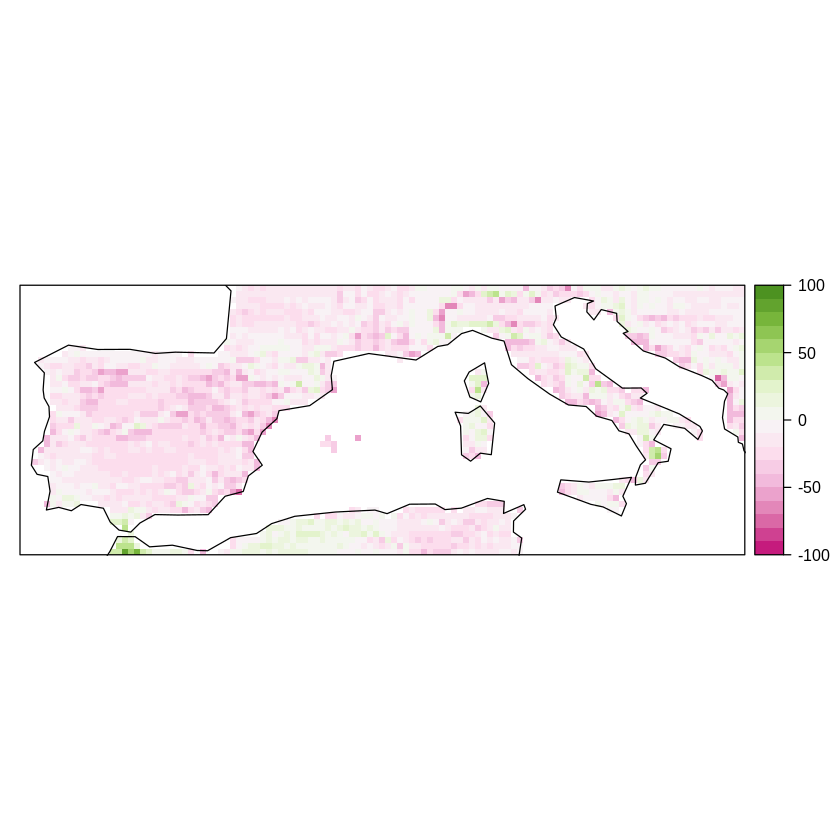

In [11]:
bias <- gridArithmetics(rcm.SU, obs.SU, operator = "-")
spatialPlot(climatology(bias), at = seq(-100,100,10),
            col.regions = colorRampPalette(colbias), backdrop.theme = "coastline") 

### 7. Loading and bias correcting (local) CORDEX future projections

In [13]:
makeAggregatedDataset(source.dir = "data/rcp85/", 
                      ncml.file = "data/rcp85.ncml", verbose = TRUE)
rcp85.tx.K <- loadGridData(dataset="data/rcp85.ncml", 
                       var = "tasmax",years = 2071:2100, season = seas,
                       lonLim = lon, latLim = lat)
rcp85.tx <- gridArithmetics(rcp85.tx.K, 273, operator = "-")

rcp85.su <- climdexGrid(tx = rcp85.tx , index.code = "SU")
rcp85.SU <- interpGrid(rcp85.su, getGrid(obs.SU))

[2018-12-20 19:18:27] Creating dataset from 6 files
[2018-12-20 19:18:27] Scanning file 1 out of 1
[2018-12-20 19:18:27] Defining aggregating dimension length
This process may be slow but will significantly speed-up data retrieval...
[2018-12-20 19:18:27] Dimension length defined
[2018-12-20 19:18:27] NcML file "data/rcp85.ncml" created from 6 files corresponding to 1 variables
Use 'dataInventory' to obtain a description of the dataset
[2018-12-20 19:18:27] Defining geo-location parameters
[2018-12-20 19:18:27] Defining time selection parameters
[2018-12-20 19:18:27] Retrieving data subset ...
[2018-12-20 19:18:31] Done
[2018-12-20 19:18:37] Calculating SU ...
[2018-12-20 19:19:14] Done
NOTE: argument 'bilin.method' ignored for nearest neighbour interpolation
[2018-12-20 19:19:14] Calculating nearest neighbors...
[2018-12-20 19:19:15] Performing nearest interpolation... may take a while
[2018-12-20 19:19:15] Done


Bias correction is performed by the `biasCorrection` function, from the [`downscaleR`](https://github.com/SantanderMetGroup/downscaleR/wiki) package. This function includes a number of standard bias correction methods:
* local (mean/variance) scaling, 
* parametric (binomial+gamma) quantile mapping (PQM).
* PQM with generalized Pareto for the extremes (GPQM). 
* empirical quantile mapping, with different extrapolation options (EQM). 

All methods can be applied separately to each calendar day (or block of days) using a moving window (e.g. `window = c(30, 1)` for a 30-day moving window). The methods PQM, GPQM and EQM have contributed to the VALUE intercomparisson initiative and are described and validated in *Gutiérrez et al. 2019 DOI: [10.1002/joc.5462](https://doi.org/10.1002/joc.5462)* (see `?biasCorrection` or the [wiki](https://github.com/SantanderMetGroup/downscaleR/wiki/bias-correction) for more details on this function).
In the following example we apply the standard EQM method; note that no moving window is applied in this case to reduce the computation time.

In [14]:
bc <- biasCorrection(y = obs.tx, x = rcm.tx,
                     newdata = rcp85.tx, method = "eqm")
bc.SU <- climdexGrid(tx = bc , index.code = "SU")

[2018-12-20 19:19:46] Argument precipitation is set as FALSE, please ensure that this matches your data.
[2018-12-20 19:20:10] Number of windows considered: 1...
[2018-12-20 19:20:12] Bias-correcting 1 members separately...
[2018-12-20 19:23:47] Done.
[2018-12-20 19:23:49] Calculating SU ...
[2018-12-20 19:24:50] Done


[2018-12-20 19:25:29] - Computing climatology...
[2018-12-20 19:25:29] - Done.


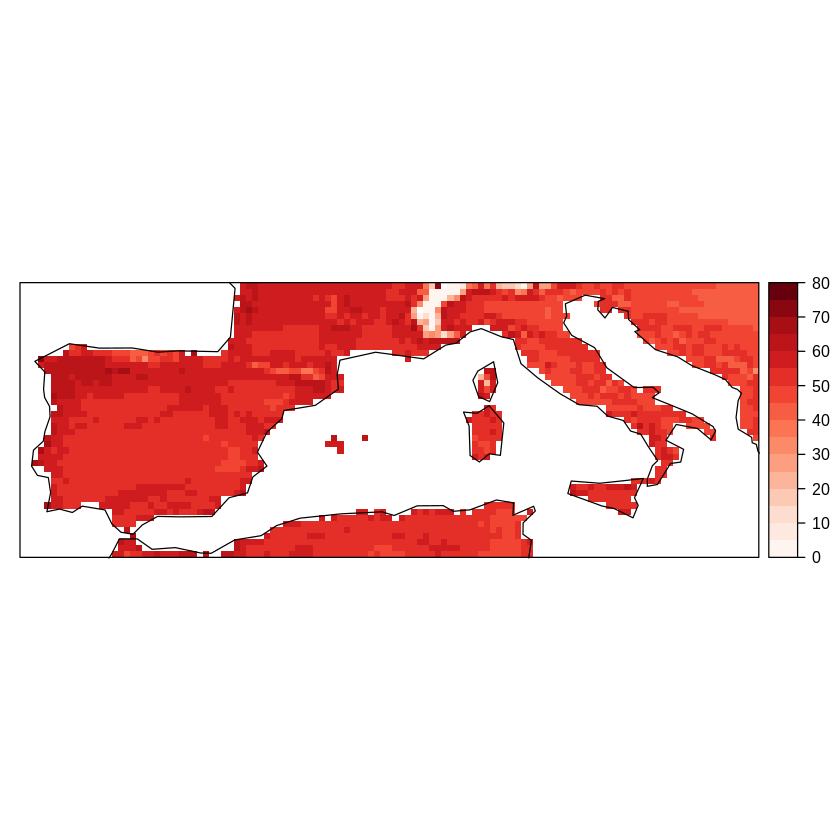

In [15]:
delta <- gridArithmetics(bc.SU, obs.SU, operator = "-")
spatialPlot(climatology(delta), at = seq(0, 80, 5),  
            col.regions = colorRampPalette(coldelta), backdrop.theme = "coastline")

The function `temporalPlot` allows to easily display the temporal time series for the different datasets, before and after bias correction.

pad applied on the interval: year
pad applied on the interval: year
pad applied on the interval: year
pad applied on the interval: year


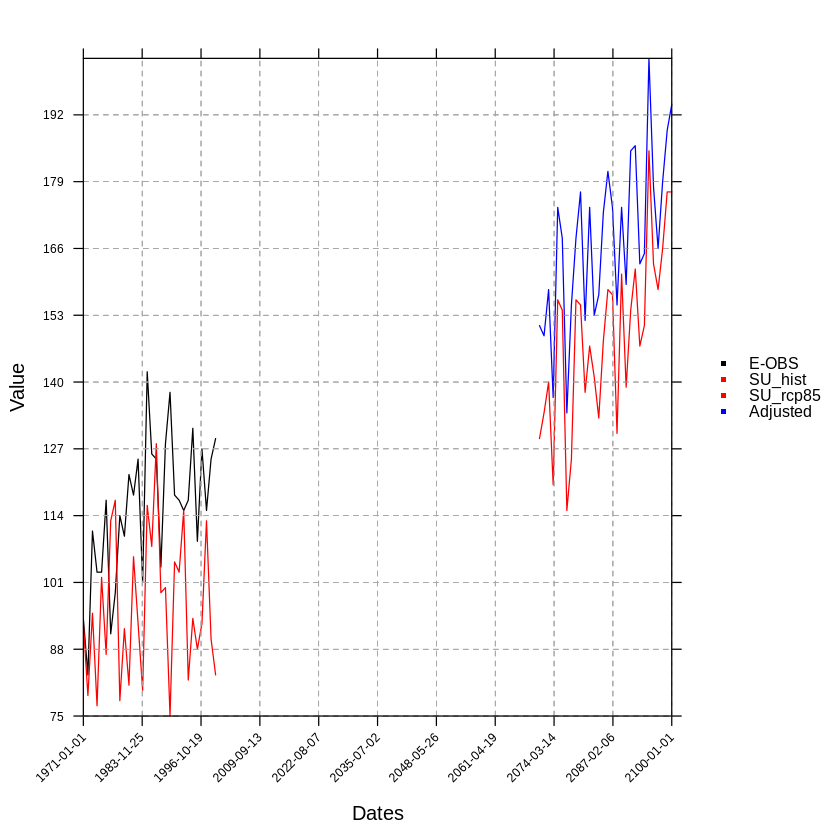

In [18]:
temporalPlot("E-OBS" = obs.SU, "SU_hist" = rcm.SU, "SU_rcp85" = rcp85.SU, "Adjusted" = bc.SU,
             latLim = 41.64, lonLim = -0.89,
             cols = c("black", "red", "red", "blue")) 

Most of the climate4R functions can transparently work with ensembles, for which an extra dimension (`member`) in the climate4R data structure is defined. A detailed description and worked out examples are provided in the climate4R reference paper, published in *Environmental Modelling & Software* journal (https://doi.org/10.1016/j.envsoft.2018.09.009).  

### ANNEX. Loading observations and CORDEX data via the climate4R UDG

The above example can be fully reproduced accesing the data transparently from the climate4R User Data Gateway (UDG). This data service provides harmonized data for a number of popular datasets in climate studies (such as gridded observations, reanalysis, or climate change projections from CORDEX and CMIP). The function `UDG.datasets` provides the full list of available datasets (the optional parameter `pattern` allows filtering, displaying only those matching the specified regular pattern). 

In [19]:
UDG.datasets(pattern = "E-OBS")$name

[1] "E-OBS_v14_0.50regular" "E-OBS_v14_0.44rotated" "E-OBS_v14_0.25regular"
[4] "E-OBS_v14_0.22rotated"

These datasets can be loaded just indicating the dataset name, as provided by `UDG.datasets`. However, registration (http://www.meteo.unican.es/udg-tap) is required in order to obtain an authorized user and password. All public datasets are available with the role "PUBLIC" which is automatically granted upon request (after accepting the different acknowledgement terms and licences holding on the datasets). The function `loginUDG` sets authorization credentials for the current R session.

In [20]:
loginUDG("UDGusr", "UDGpswrd")

[2018-12-20 19:26:27] Setting credentials...
[2018-12-20 19:26:27] Success!
Go to <http://www.meteo.unican.es/udg-tap/home> for details on your authorized groups and datasets


NOTE: Accessing harmonized data from a public UDG dataset
[2018-12-20 19:27:22] Defining harmonization parameters for variable "tasmax"
[2018-12-20 19:27:22] Opening dataset...
[2018-12-20 19:27:23] The dataset was successfuly opened
[2018-12-20 19:27:23] Defining geo-location parameters
[2018-12-20 19:27:24] Defining time selection parameters
[2018-12-20 19:27:24] Retrieving data subset ...
[2018-12-20 19:28:30] Done
[2018-12-20 19:28:31] - Computing climatology...
[2018-12-20 19:28:31] - Done.


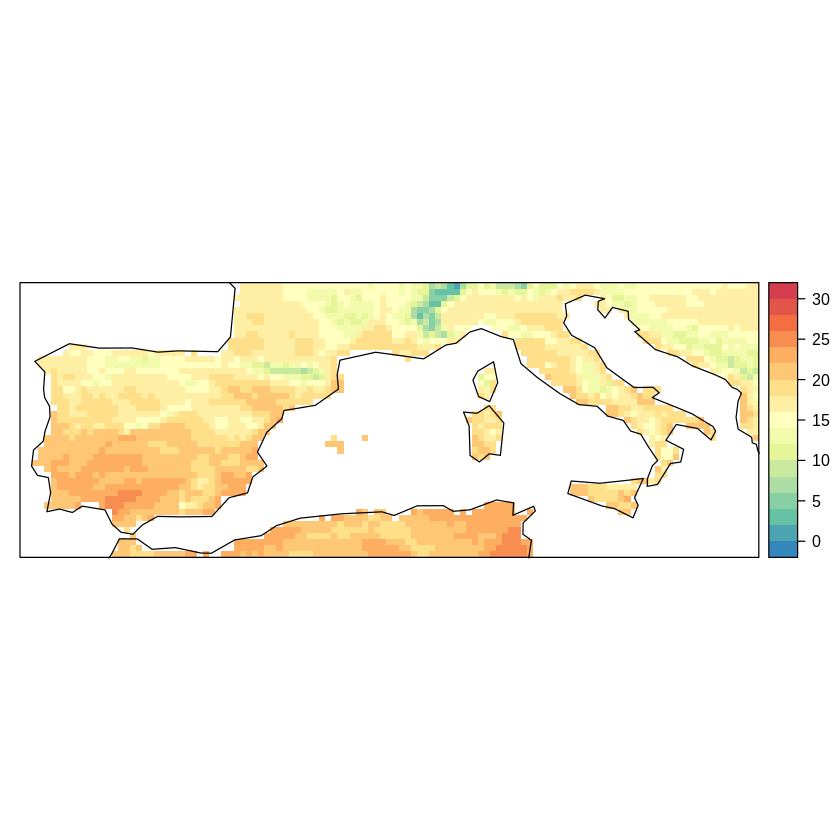

In [21]:
obs.tx <- loadGridData("E-OBS_v14_0.25regular", var = "tasmax",
                       years = 1971:2000, season = seas,
                       lonLim = lon, latLim = lat)
spatialPlot(climatology(obs.tx), at = seq(-2, 32, 2),
            col.regions = colorRampPalette(coltx), backdrop.theme = "coastline") 

In [22]:
historical <- UDG.datasets(pattern = "EUR44.*historical")$name 
print(historical)


 [1] "CORDEX-EUR44_EC-EARTH_r12i1p1_historical_RCA4_v1"       
 [2] "CORDEX-EUR44_CNRM-CM5_r1i1p1_historical_RCA4_v1"        
 [3] "CORDEX-EUR44_EC-EARTH_r1i1p1_historical_RACMO22E_v1"    
 [4] "CORDEX-EUR44_EC-EARTH_r3i1p1_historical_HIRHAM5_v1"     
 [5] "CORDEX-EUR44_IPSL-CM5A-MR_r1i1p1_historical_RCA4_v1"    
 [6] "CORDEX-EUR44_HadGEM2-ES_r1i1p1_historical_RCA4_v1"      
 [7] "CORDEX-EUR44_HadGEM2-ES_r1i1p1_historical_RACMO22E_v1"  
 [8] "CORDEX-EUR44_MPI-ESM-LR_r1i1p1_historical_CCLM4-8-17_v1"
 [9] "CORDEX-EUR44_MPI-ESM-LR_r1i1p1_historical_RCA4_v1"      
[10] "CORDEX-EUR44_IPSL-CM5A-MR_r1i1p1_historical_WRF331F_v1" 
[11] "CORDEX-EUR44_MPI-ESM-LR_r1i1p1_historical_REMO2009_v1"  
[12] "CORDEX-EUR44_MPI-ESM-LR_r2i1p1_historical_REMO2009_v1"  


NOTE: Accessing harmonized data from a public UDG dataset
[2018-12-20 19:28:43] Defining harmonization parameters for variable "tasmax"
[2018-12-20 19:28:43] Opening dataset...
[2018-12-20 19:28:49] The dataset was successfuly opened
[2018-12-20 19:28:49] Defining geo-location parameters
[2018-12-20 19:28:50] Defining time selection parameters
[2018-12-20 19:28:50] Retrieving data subset ...
[2018-12-20 19:29:19] Done
[2018-12-20 19:29:19] - Computing climatology...
[2018-12-20 19:29:19] - Done.


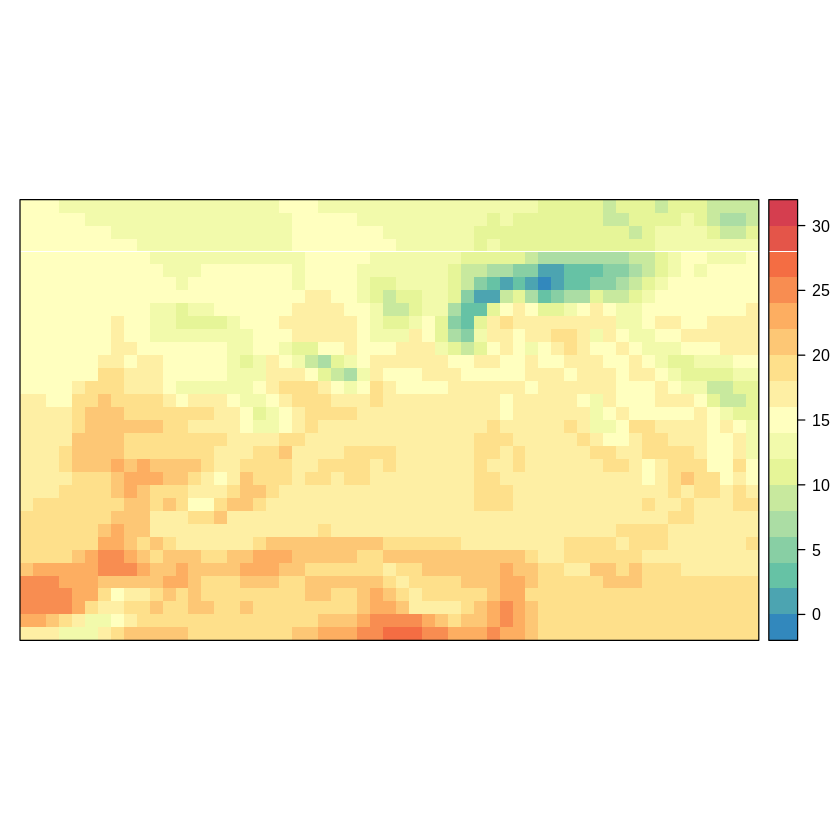

In [23]:
rcm.tx <- loadGridData(historical[1], var = "tasmax",
                       years = 1971:2000, season = seas,
                       lonLim = lon, latLim = lat)
spatialPlot(climatology(rcm.tx), at = seq(-2, 32, 2),
            col.regions = colorRampPalette(coltx), backdrop.theme = "coastline") 

 [1] "CORDEX-EUR44_EC-EARTH_r12i1p1_rcp85_RCA4_v1"       
 [2] "CORDEX-EUR44_CNRM-CM5_r1i1p1_rcp85_RCA4_v1"        
 [3] "CORDEX-EUR44_EC-EARTH_r1i1p1_rcp85_RACMO22E_v1"    
 [4] "CORDEX-EUR44_EC-EARTH_r3i1p1_rcp85_HIRHAM5_v1"     
 [5] "CORDEX-EUR44_IPSL-CM5A-MR_r1i1p1_rcp85_RCA4_v1"    
 [6] "CORDEX-EUR44_HadGEM2-ES_r1i1p1_rcp85_RCA4_v1"      
 [7] "CORDEX-EUR44_HadGEM2-ES_r1i1p1_rcp85_RACMO22E_v1"  
 [8] "CORDEX-EUR44_MPI-ESM-LR_r1i1p1_rcp85_CCLM4-8-17_v1"
 [9] "CORDEX-EUR44_MPI-ESM-LR_r1i1p1_rcp85_RCA4_v1"      
[10] "CORDEX-EUR44_IPSL-CM5A-MR_r1i1p1_rcp85_WRF331F_v1" 
[11] "CORDEX-EUR44_MPI-ESM-LR_r1i1p1_rcp85_REMO2009_v1"  
[12] "CORDEX-EUR44_MPI-ESM-LR_r2i1p1_rcp85_REMO2009_v1"  


NOTE: Accessing harmonized data from a public UDG dataset
[2018-12-20 19:30:24] Defining harmonization parameters for variable "tasmax"
[2018-12-20 19:30:24] Opening dataset...
[2018-12-20 19:30:24] The dataset was successfuly opened
[2018-12-20 19:30:24] Defining geo-location parameters
[2018-12-20 19:30:24] Defining time selection parameters
[2018-12-20 19:30:25] Retrieving data subset ...
[2018-12-20 19:30:54] Done
[2018-12-20 19:30:54] - Computing climatology...
[2018-12-20 19:30:54] - Done.


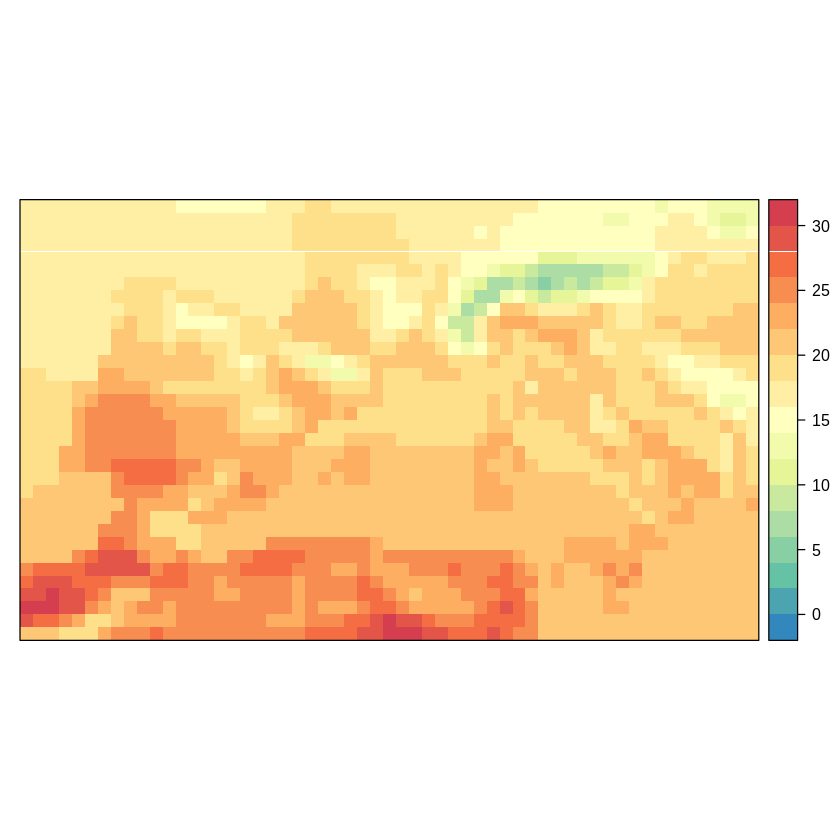

In [25]:
rcp85 <- UDG.datasets(pattern = "EUR44.*rcp85")$name
print(rcp85)
rcp85.tx <- loadGridData(rcp85[1], var = "tasmax",
                         years = 2071:2100, season = seas,
                         lonLim = lon, latLim = lat)
spatialPlot(climatology(rcp85.tx), at = seq(-2, 32, 2),
            col.regions = colorRampPalette(coltx), backdrop.theme = "coastline")  